<a href="https://colab.research.google.com/github/markuskunej/air-pollution-thesis/blob/master/process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is used to process the csv file data, and turn it into pandas dataframes objects

In [15]:
def append_to_df(dict_of_dfs, key, current_df):
  df_to_append_to = dict_of_dfs.get(key)

  if df_to_append_to is not None:
    df_to_append_to.append(current_df)
  else:
    dict_of_dfs[key] = [current_df]


In [20]:
import numpy as np

replace_zeros = {"CO", "CO2", "Humidity", "NO", "NO2", "O3", "Pressure"}
no_duplicates = {"CO", "CO2", "Humidity", "NO", "NO2", "Noise", "NoiseLEQ", "NoiseMax", "WindDirection", "WindGust", "WindSpeed"}
def clean_data(variable_name, df):
  # replace zeros with NaN so it's not included in mean calculation
  if variable_name in replace_zeros:
    df.replace(0, np.NaN, inplace=True)

  # replace consecutive duplicates (at least 10 in a row) with NaN values
  if variable_name in no_duplicates:
    df.mask((df.shift(1) == df) & (df.shift(2) == df) & (df.shift(3) == df) \
            & (df.shift(4) == df) & (df.shift(5) == df) & (df.shift(6) == df) \
            & (df.shift(7) == df) & (df.shift(8) == df) & (df.shift(9) == df), \
            inplace=True)

  #if interval is "1m":
  #  # Note when NaN values occur
  #  for device in df.columns:
  #    device_nan_count = df[device].isna().sum()
  #    nan_df.set_value(month, device, device_nan_count)

  


In [21]:
import pandas as pd
import os
import glob

DATA_PATH = "/content/drive/MyDrive/Air_Pollution_Data"
print(os.path.join(DATA_PATH , "/*.csv"))
all_files = glob.glob(DATA_PATH + '/*.csv')
keys = []
nan_dfs = {}
dfs_dict = {}
big_dfs = {}
ultra_dfs = {}
big_df = []
for file_name in all_files:
  df = pd.read_csv(file_name, parse_dates=["Time"])

  variable_names = os.path.basename(file_name).split(".")[0].split("_") #get names from csv file, i.e. Y&E_1m_Aug22_03_CO2
  data_variable = variable_names[3]
  clean_data(data_variable, df)
  df[data_variable] = df.mean(axis=1)
  #keys.append(variable_name)
  df.set_index('Time', inplace=True)
  df = df.tz_localize(tz='US/Eastern', ambiguous='infer')
  print(df[df.index.duplicated(keep=False)])

  # reduce dataframe columns to only the average
  df = df[[data_variable]]

  key = variable_names[0] + "_" + variable_names[1] + "_" + variable_names[3] # i.e. Y&E_15m_CO

  #append to right series (location + interval)
  append_to_df(dfs_dict, key, df)

# concat dataframes (grouped by variables per month) into one
for df_series in dfs_dict:
  df = pd.concat(dfs_dict[df_series])
  variables = df_series.split('_') # Y&E_1m_CO
  big_key = variables[0] + '_' + variables[1]
  append_to_df(big_dfs, big_key, df)

# concat dataframes (grouped by variables) into one
for df_series in big_dfs:
  ultra_dfs[df_series] = pd.concat(big_dfs[df_series], axis=1)

for df_name in ultra_dfs:
  print(ultra_dfs[df_name].head())

/*.csv
Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO]
Index: []
Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"},

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO]
Index: []
Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {De

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO2]
Index: []
Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Po

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO]
Index: []
Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO {De

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Noise]
Index: []
Empty DataFrame
Columns: [O3 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, O3 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, O3 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, O3 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C46E

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM2]
Index: []
Empty DataFrame
Columns: [Pressure {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Pressure {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Pre

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {Device

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO2]
Index: []
Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Po

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO2]
Index: []
Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C46E4021

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [O3 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, O3 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, O3 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, O3 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, O3]
Index: []
Empty DataFrame
Columns: [PM1 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM1 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, 

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM10 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM10 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM10]
Index: []
Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Pressure {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Pressure {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Pressure]
Index: []
Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Temperature {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindDirection {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, WindDirection]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2]
Index: []
Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2]
Index: []


<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Humidity]
Index: []
Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-102

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO]
Index: []
Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, 

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Noise]
Index: []
Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise {DeviceID=

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NoiseMax]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NoiseMax]
Index: []
Empty DataFrame
Columns: [O3 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, O3 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, O3 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, O3 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, O3 {DeviceID="AirSENCE-1021C

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM1 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM1 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM1]
Index: []
Empty DataFrame
Columns: [PM10 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM10 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C46E40217", na

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM2]
Index: []
Empty DataFrame
Columns: [Pressure {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Pressure {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Pre

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Temperature]
Index: []
Empty DataFrame
Columns: [WindDirection {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C65A40214"

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO]
Index: []
Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, 

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Humidity]
Index: []
Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO2]
Index: []
Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Po

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Noise]
Index: []
Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Noise]
Index: []
Empty DataFrame
Columns: [Noise {DeviceID="AirSENCE-0322223F

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [Noise_LEQ {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseLEQ]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseMax]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM2]
Index: []
Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="A

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [PM10 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM10 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM10]
Index: []
Empty DataFrame
Columns: [PM10 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM10 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C46

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Temperature]
Index: []
Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [WindDirection {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindDirection]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindGust]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO]
Index: []
Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {De

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2]
Index: []
Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Humidity

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Humidity]
Index: []
Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-102

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO]
Index: []
Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, 

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO2]
Index: []
Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Po

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [Noise_LEQ {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseLEQ]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseMax]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM10 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM10 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM10 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM10 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM10]
Index: []
Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Pressure {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Pressure {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Pressure {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Pressure {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Pressure]
Index: []
Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Temperature {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindDirection {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindDirection {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindDirection]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindGust]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindSpeed {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindSpeed {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindSpeed]
Index: []
Empty DataFrame
Columns: [CO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, CO]
Index: []
Empty Da

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2]
Index: []
Empty DataFrame
Columns: [CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, CO2]
Index: []


<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Humidity {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Humidity]
Index: []
Empty DataFrame
Columns: [Humidity {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Humidity {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Humidity {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Humidity {DeviceID="AirSENCE-102

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [NO {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, NO {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NO]
Index: []
Empty DataFrame
Columns: [NO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, NO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, NO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, NO2 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, 

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)


Empty DataFrame
Columns: [Noise_LEQ {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseLEQ]
Index: []
Empty DataFrame
Columns: [Noise_LEQ {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_LEQ {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_LEQ {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, NoiseMax]
Index: []
Empty DataFrame
Columns: [Noise_Max {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Noise_Max {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Noise_Max {DeviceI

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM1 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM1 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM1]
Index: []
Empty DataFrame
Columns: [PM1 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM1 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM1 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM1 {DeviceID="AirSENCE-1021C46E40217", name="Po

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, PM2]
Index: []
Empty DataFrame
Columns: [PM2_5 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, PM2_5 {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, PM2_5 {DeviceID="A

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, Temperature {DeviceID="AirSENCE-1021C73840220", name="Pollutant"}, Temperature]
Index: []
Empty DataFrame
Columns: [Temperature {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, Temperature {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}, Temperature {DeviceID="AirSENCE-032223EF40231", name="

<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[data_variable] = df.mean(axis=1)
<ipython-input-21-9688a84c3691>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindGust]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}, WindGust]
Index: []
Empty DataFrame
Columns: [WindGust {DeviceID="AirSENCE-032206C140232", name="Pollutant"}, WindGust {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}, WindGust {DeviceID="AirSENCE-1021C65A40214", name=

Plot Data

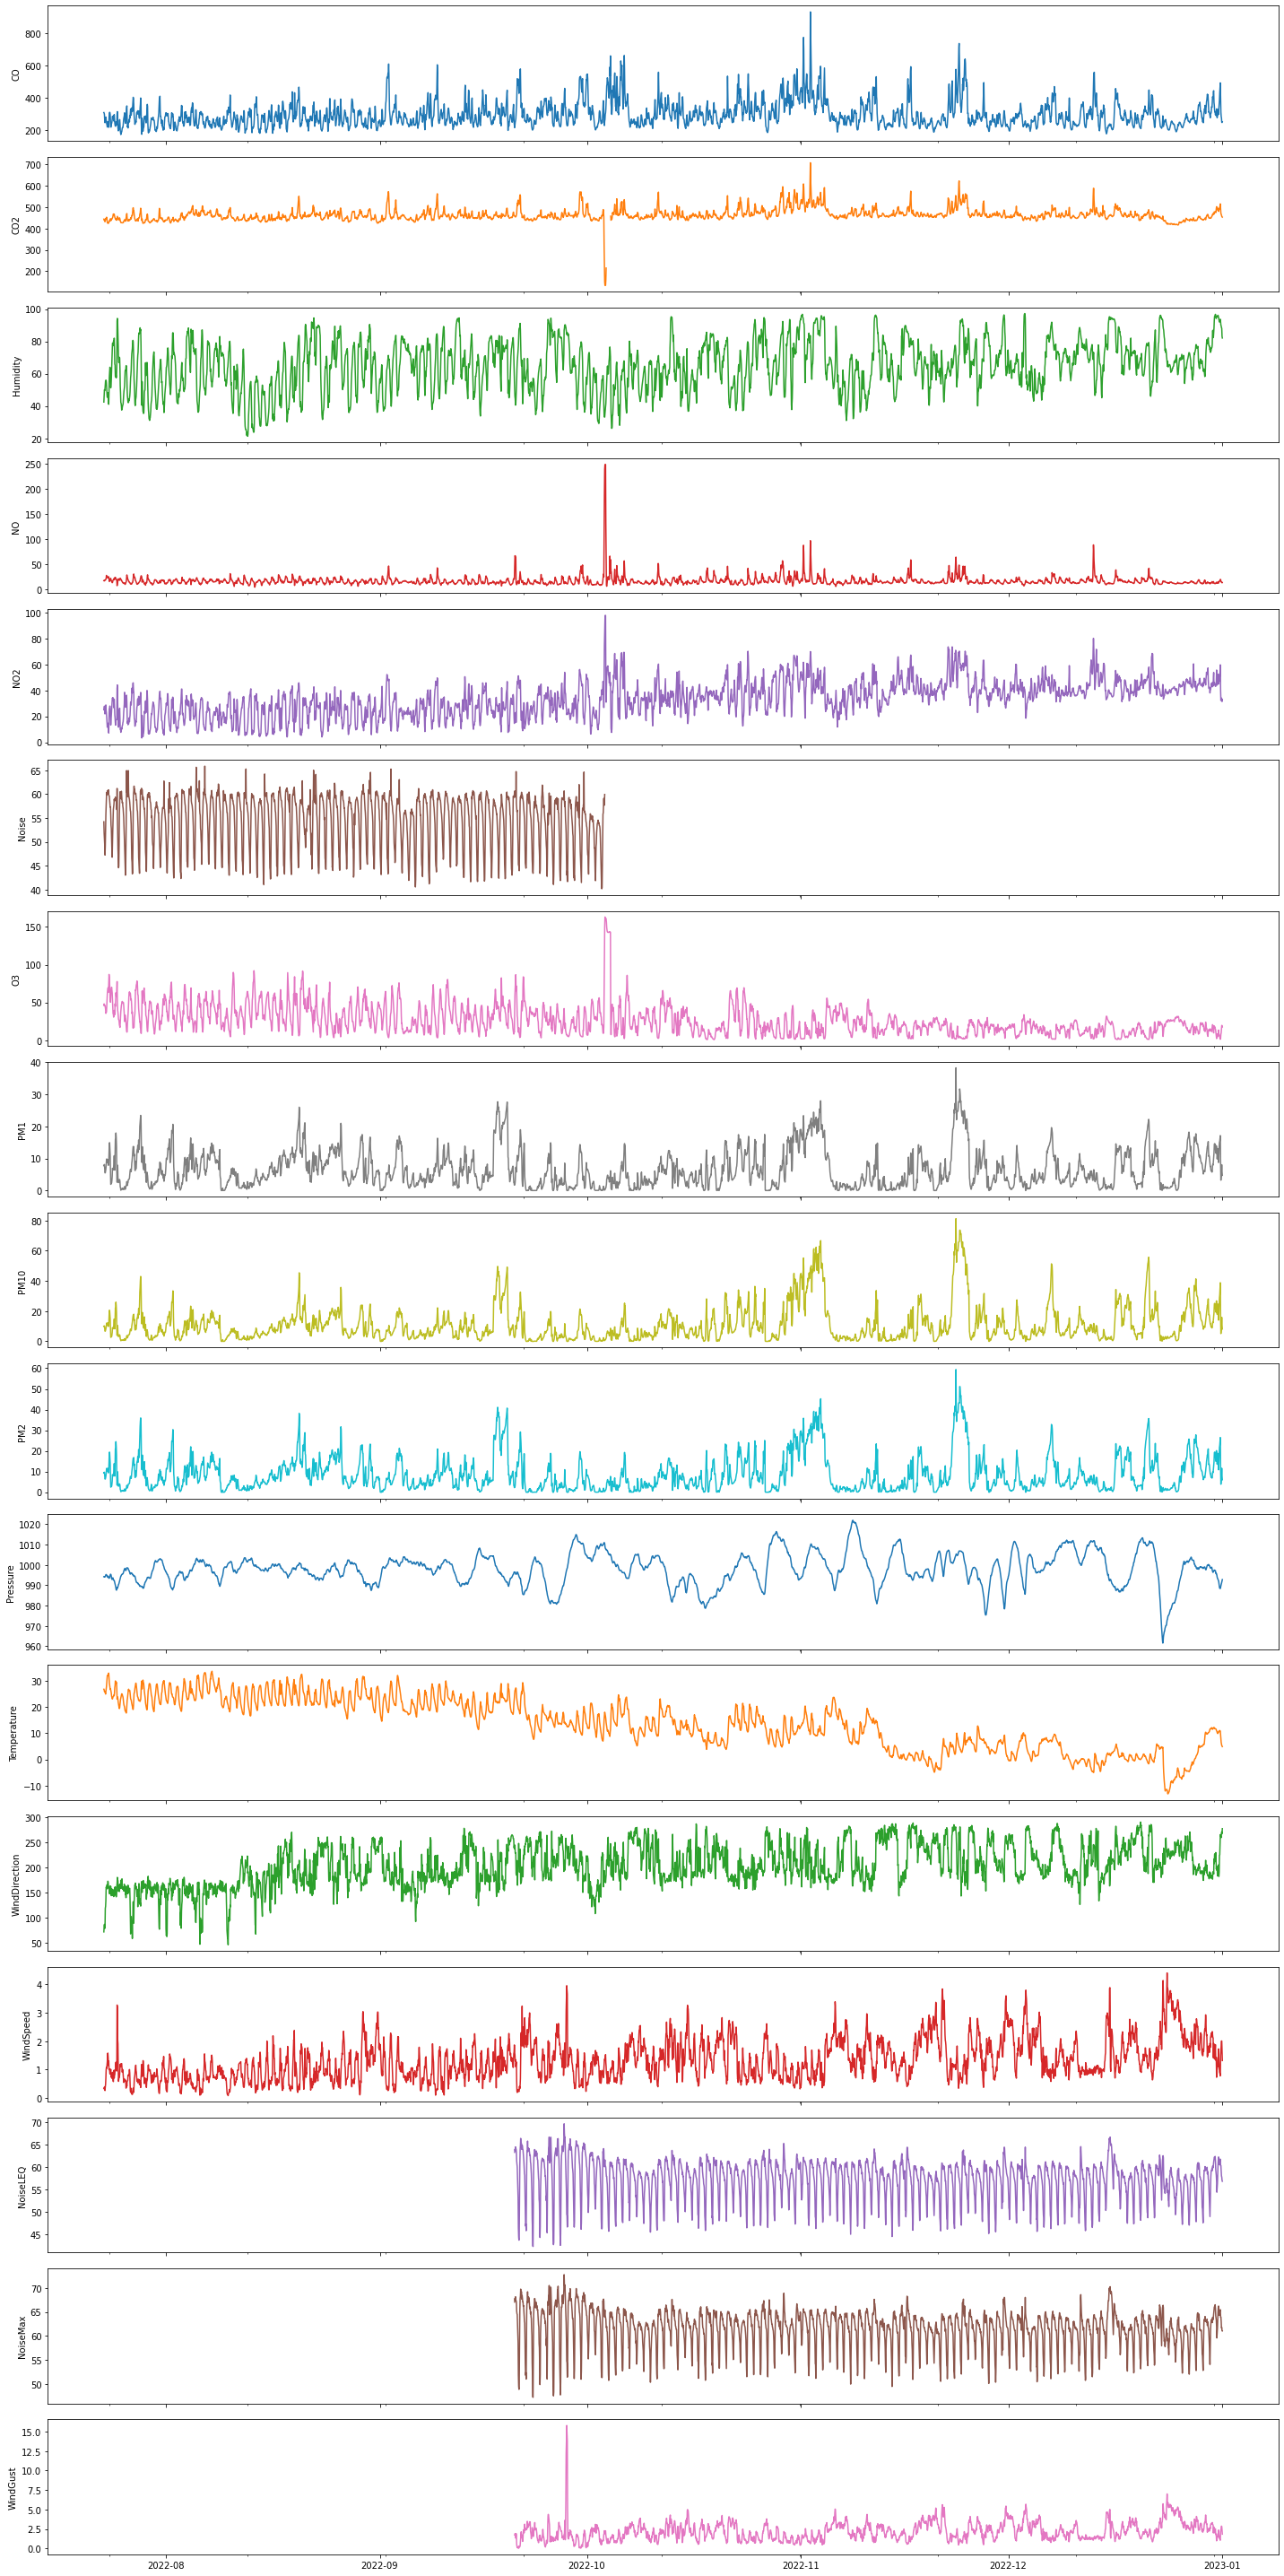

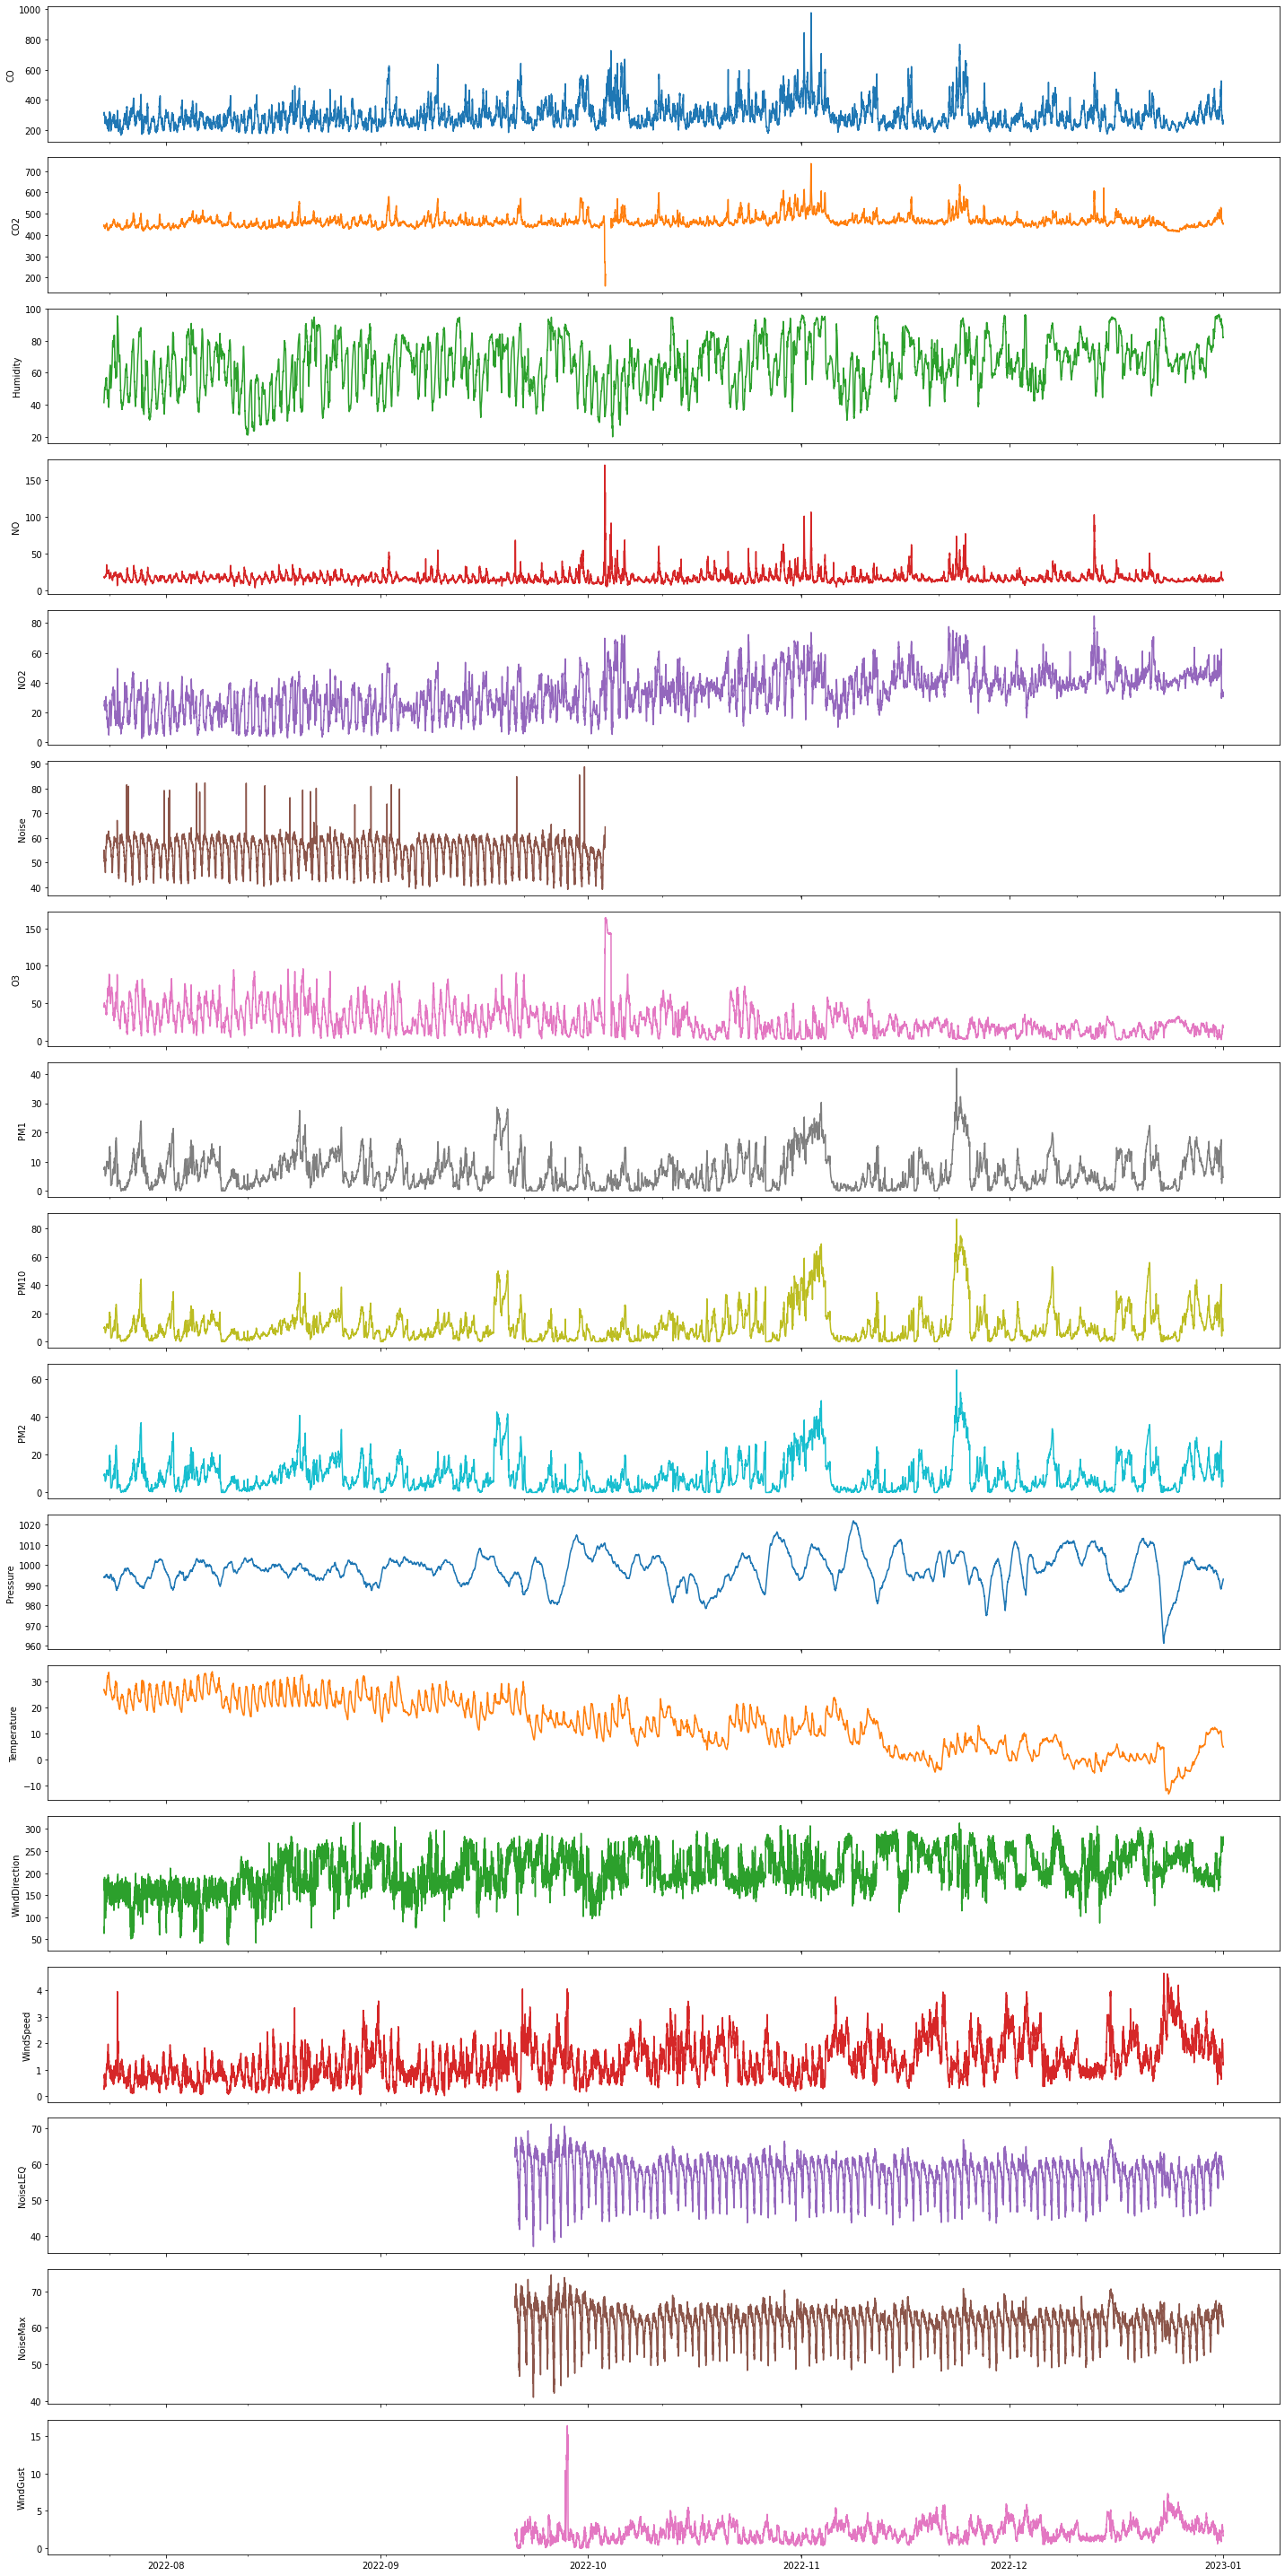

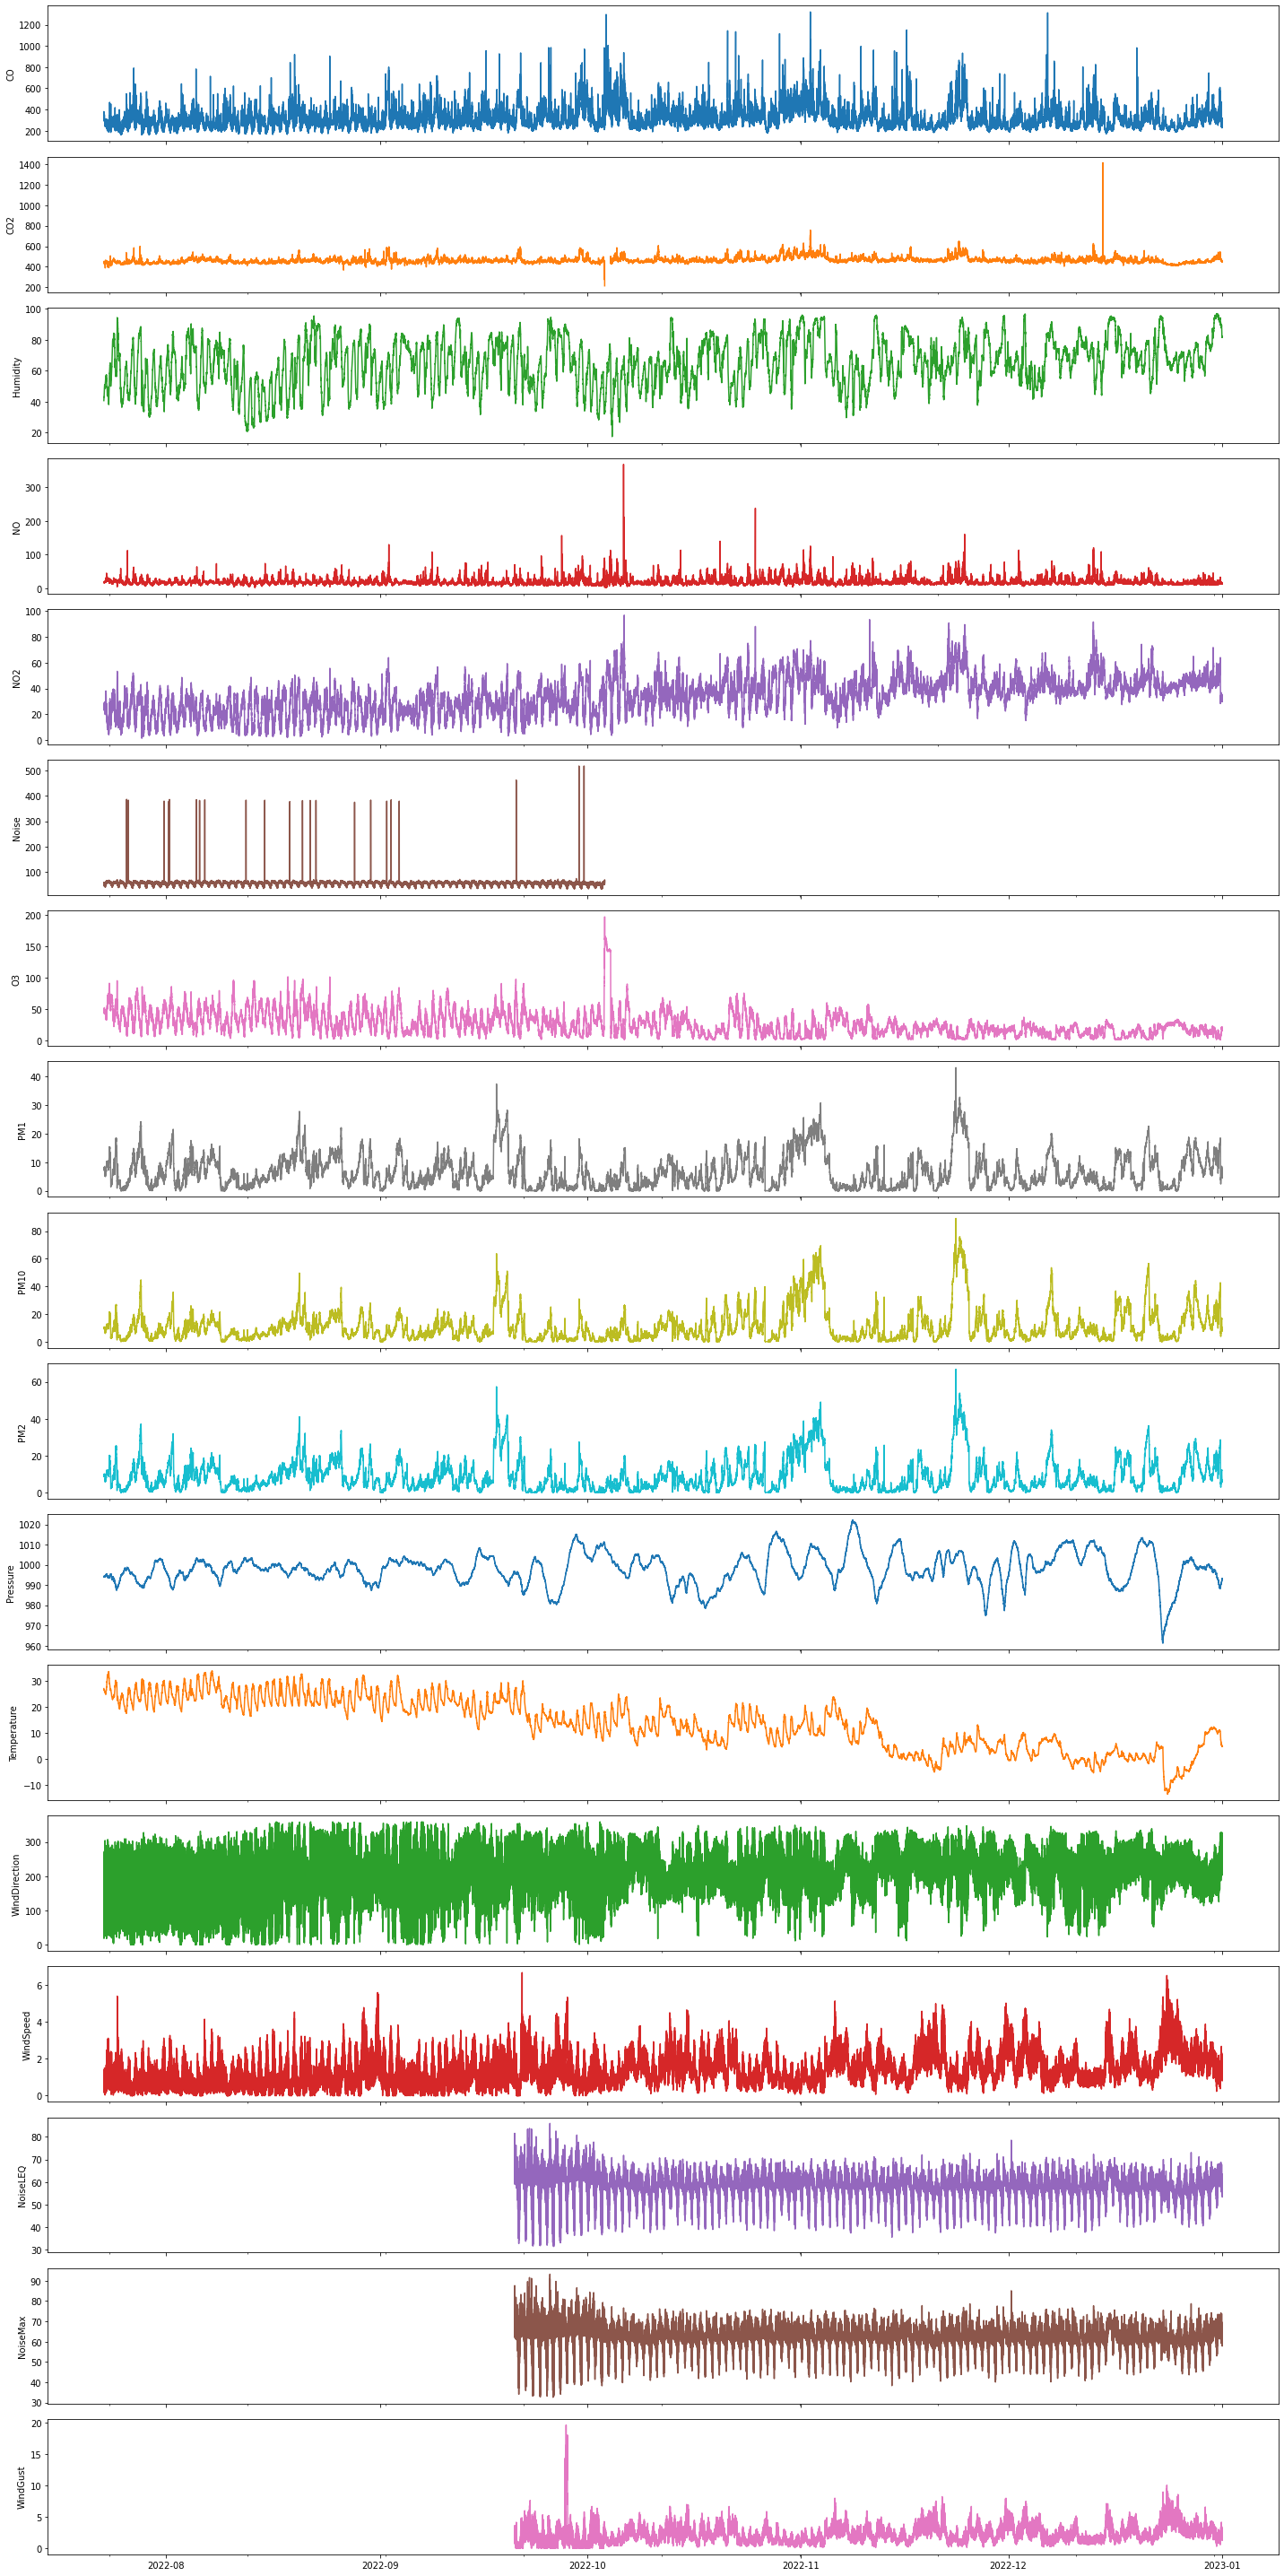

In [13]:
import matplotlib.pyplot as plt

def plot_df(df):
  plot_cols = df.columns
  fig,ax = plt.subplots(len(plot_cols), figsize=(20,40), sharex=True)
  df.plot(subplots=True, legend=False, ax=ax)
  for a in range(len(ax)): 
      ax[a].set_ylabel(plot_cols[a])
  ax[-1].set_xlabel('')
  plt.tight_layout()
  plt.show()

for df_name in ultra_dfs:
  plot_df(ultra_dfs[df_name])

Save Dataframes as pickle files

In [23]:
for df_name in ultra_dfs:
  file_name = DATA_PATH + '/dataframes/' + df_name + '.pkl'
  ultra_dfs[df_name].to_pickle(file_name)

In [24]:
print(ultra_dfs['Y&E_1m'][ultra_dfs['Y&E_1m']["WindDirection"].isnull()].index.tolist())

[Timestamp('2022-08-15 20:53:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 20:54:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 20:56:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 20:57:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 20:58:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 21:00:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 21:03:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 21:45:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 22:15:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 22:16:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 22:29:00-0400', tz='US/Eastern'), Timestamp('2022-08-15 22:37:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 02:49:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 18:56:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 21:18:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 21:23:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 23:21:00-0400', tz='US/Eastern'), Timestamp('2022-08-16 23:45:00-0400', tz='US/Ea